# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('./insurance2.csv')

In [2]:
#sampling function for patients without an 'insuranceclaim'
def medical0_sampler(n):
    return np.random.choice(medical0.charges, n)


#sampling function for patients with an 'insuranceclaim'
def medical1_sampler(n):
    return np.random.choice(medical1.charges, n)

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [5]:
charges_mean = medical.charges.mean()
charges_mean

13270.422265141257

In [6]:
charges_std = medical.charges.std(ddof=1)
charges_std

12110.011236693994

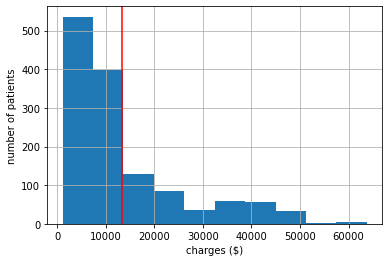

In [7]:
medical.charges.hist()
plt.ylabel('number of patients')
plt.xlabel('charges ($)')
_ = plt.axvline(charges_mean, color='r', linestyle='-')

<font color='red'> appropriateness of these statistics??? </font> these are the statistics for this data on medical charges per person. notably this is not a normal distribution but instead right skewed.

the mean of the data is a single formula regardless of whether dealing with a the population parameter or sample.

the standard deviation includes the bessel correction of n - 1 instead of n in the denominator. this is done by specifying ddof=1 in the .std() argument. N - ddof.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ 

1338 is a decent number of rows in the sample?

bootstrap resampling for the mean for medical charges of a decent size n? use t-value (i.e. t-distribution) and 95% confidence interval?

In [8]:
#The administrator is concerned that the actual average charge has fallen below 12,000, 
# threatening the hospital's operational model. On the assumption that these data represent
# a random sample of charges, how would you justify that these data allow you to answer that question?

__A:__ 

these data are of a sufficiently large sample size of 1338 (i.e. > 30) and are a random sample of charges. we can run a test on this data to determine if the mean charge is greater or less than 12,000 using a 95% confidence interval.

In [9]:
#And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?


__A:__ 

t-distribution hypothesis test with a 95% confidence interval

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

give the nature of the administrator's concern, the appropriate confidence interval in this case is at least a 95% confidence interval.

this a one-sided interval since we want to know whether we can avoid too small a mean medical charge (i.e. mean charge on the lower end) without regard to the higher end medical charges

In [21]:
# Calculate the critical value and the relevant 95% confidence interval for the mean,
# and comment on whether the administrator should be concerned.



In [10]:
#naive???


n = len(medical.charges)

df = n - 1


conf_level = .95

alpha = 1 - conf_level



t_value = t.ppf(1.0-alpha, df)
t_value

1.6459941145571317

In [11]:
#t look up table, n=1000, .05 area in one tail --> t = 1.646

In [46]:
'''
x_bar +- t * std / sqrt(n)

The formula for constructing a CI with the t-distribution.
'''
#https://www.statisticshowto.com/probability-and-statistics/confidence-interval/

'\nx_bar +- t * std / sqrt(n)\n\nThe formula for constructing a CI with the t-distribution.\n'

In [47]:
'''
The T Distribution (and the associated t scores), are used in hypothesis testing when you want to
figure out if you should accept or reject the null hypothesis...

In general, this distribution is used when you have a small sample size (under 30) or you don’t know
the population standard deviation
'''
#https://www.statisticshowto.com/probability-and-statistics/t-distribution/

'\nThe T Distribution (and the associated t scores), are used in hypothesis testing when you want to\nfigure out if you should accept or reject the null hypothesis...\n\nIn general, this distribution is used when you have a small sample size (under 30) or you don’t know\nthe population standard deviation\n'

In [48]:
#x_bar +- t * std / sqrt(n)

charges_lower = charges_mean - (t_value * charges_std / np.sqrt(n))
charges_lower

12725.48718381623

In [49]:
charges_upper = charges_mean + (t_value * charges_std / np.sqrt(n))
charges_upper

13815.357346466282

In [50]:
charges_mean_ci = (charges_lower, charges_upper)
charges_mean_ci

(12725.48718381623, 13815.357346466282)

In [17]:
'''
T Statistic Formula
The statistic can be found in so many different ways, there is no single formula for it. The formula
depends on what type of test you are trying to do. For example:

One sample t test. This is the most common type of t test you’ll come across in elementary statistics.
You can test the mean of a single group against a known mean. For example, the average IQ is 100.
You can test a class of children with a mean score of 90 to see if that’s significant, or if it just
happened by chance.
'''
#https://www.statisticshowto.com/t-statistic/

'\nT Statistic Formula\nThe statistic can be found in so many different ways, there is no single formula for it. The formula\ndepends on what type of test you are trying to do. For example:\n\nOne sample t test. This is the most common type of t test you’ll come across in elementary statistics.\nYou can test the mean of a single group against a known mean. For example, the average IQ is 100.\nYou can test a class of children with a mean score of 90 to see if that’s significant, or if it just\nhappened by chance.\n'

In [18]:
'''
t = (x_bar - mean )/ (s / sqrt(n))
'''
#https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-sample-t-test/

'\nt = (x_bar - mean )/ (s / sqrt(n))\n'

In [19]:
'''
The t-test is invalid for small samples from non-normal distributions, but it is valid for
large samples from non-normal distributions.
'''
#https://stats.stackexchange.com/questions/9573/t-test-for-non-normal-when-n50

'\nThe t-test is invalid for small samples from non-normal distributions, but it is valid for\nlarge samples from non-normal distributions.\n'

In [20]:
'''
Bootstrapping

It may also be used for constructing hypothesis tests. It is often used as an alternative to
statistical inference based on the assumption of a parametric model when that assumption is in doubt,
or where parametric inference is impossible or requires complicated formulas for the calculation of
standard errors.
'''
#https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

'\nBootstrapping\n\nIt may also be used for constructing hypothesis tests. It is often used as an alternative to\nstatistical inference based on the assumption of a parametric model when that assumption is in doubt,\nor where parametric inference is impossible or requires complicated formulas for the calculation of\nstandard errors.\n'

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ An assumption is the two groups have homogeneity of variance.

__A:__ The null hypothesis is patient charges are approximately equal independent of an insurance claim.

The alternative hypothesis is patient charges are not approximately equal between groups by insurance claim.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [22]:
#Perform this hypothesis test both manually, using the above formulae

#For the manual approach, calculate the value of the test statistic and then its probability (the p-value).
#Verify you get the same results from both.

In [23]:
#Perform this hypothesis test both manually, using the above formulae
#s_p = np.sqrt((n0 - 1)*s0**2 + (n1 - 1)*s1**2 ) / np.sqrt(n0 + n1 - 2)



In [24]:
#t = (x_bar0 - x_bar1) / s_p / np.sqrt(1/n0 + 1/n1)

In [25]:
'''n1 = medical.value_counts('insuranceclaim')[1]
n1'''

"n1 = medical.value_counts('insuranceclaim')[1]\nn1"

In [26]:
'''n0 = medical.value_counts('insuranceclaim')[0]
n0'''

"n0 = medical.value_counts('insuranceclaim')[0]\nn0"

In [27]:
medical0 = medical[medical.insuranceclaim == 0].reset_index(drop=True)
print(medical0.shape)
medical0.head()

(555, 8)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,28,1,33.000,3,0,2,4449.46200,0
1,33,1,22.705,0,0,1,21984.47061,0
2,31,0,25.740,0,0,2,3756.62160,0
3,37,0,27.740,3,0,1,7281.50560,0
4,37,1,29.830,2,0,0,6406.41070,0


In [28]:
medical1 = medical[medical.insuranceclaim == 1].reset_index(drop=True)
print(medical1.shape)
medical1.head()

(783, 8)


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.9240,1
1,18,1,33.77,1,0,2,1725.5523,1
2,32,1,28.88,0,0,1,3866.8552,1
3,46,0,33.44,1,0,2,8240.5896,1
4,25,1,26.22,0,0,0,2721.3208,1


In [29]:
'''s0 = np.std(medical0.charges)
s0'''

's0 = np.std(medical0.charges)\ns0'

In [30]:
'''s1 = np.std(medical1.charges)
s1'''

's1 = np.std(medical1.charges)\ns1'

In [31]:
m0_sample_means1000 = [medical0_sampler(100).mean() for i in range(1000)]
m0_sample_means1000

[9692.534699799999,
 10102.0233254,
 7668.8866494,
 8437.6961061,
 8660.4230135,
 9205.1834115,
 8077.980123500001,
 9409.034679600001,
 9250.4039945,
 8237.6956799,
 8187.174096,
 8199.0514772,
 9834.6533006,
 9094.392415799999,
 8979.4686725,
 8972.2861806,
 7249.5300266,
 9241.1219906,
 8704.9926621,
 9726.232390800002,
 8220.6652303,
 8701.5381417,
 8672.8836427,
 8373.6800337,
 9116.3216615,
 8266.8267214,
 8331.6640721,
 8359.1292085,
 8410.9622763,
 7663.309590500001,
 8957.081309399999,
 7830.885392499999,
 9752.671639600001,
 8340.40602,
 7914.3328998000015,
 8739.3624089,
 9710.9610398,
 8568.704391800002,
 9147.48614,
 8248.4119567,
 9232.2883698,
 8874.635665000002,
 8499.8331104,
 9022.813407500002,
 9140.6774161,
 9018.810429199999,
 8193.3576587,
 9930.848411800001,
 8522.4998699,
 7795.676891599998,
 7888.375642499999,
 8189.489561700001,
 9101.0503861,
 8896.1436553,
 9710.5548967,
 9335.3280837,
 9063.2107194,
 8476.642104,
 8428.308726800002,
 9010.7857352,
 7772.761

In [32]:
s0 = np.std(m0_sample_means1000)
s0

646.3099914440741

In [33]:
m1_sample_means1000 = [medical1_sampler(500).mean() for i in range(1000)]
m1_sample_means1000

[16761.928230556,
 16290.570661356001,
 16328.480009780002,
 14981.819494878,
 16772.48986662,
 16952.619362620004,
 15851.690329398,
 15822.291151596,
 16028.360307039999,
 16494.669144358002,
 16130.310689634001,
 16831.241428677997,
 15939.502510780003,
 16318.133380579999,
 16377.2863589,
 15819.392436980002,
 17356.029744158,
 16507.930633758,
 16511.345439359997,
 16251.83432584,
 15408.327839680001,
 16026.01544056,
 16348.439469896,
 16281.469902756,
 15789.84980188,
 15961.230498920002,
 15668.922264538,
 16067.403426616,
 16083.02803464,
 16739.801971356002,
 17745.351081597997,
 16677.848590076,
 16466.02340622,
 16241.724687553999,
 16491.28718522,
 16888.88273936,
 15576.22245666,
 15713.038224578,
 15259.086095594,
 16803.199293,
 15943.550736017998,
 16412.3260065,
 15683.568543176001,
 16081.055192655998,
 16797.466263098,
 16677.309776416,
 16230.985451399998,
 16534.660384098002,
 17376.330746838,
 16487.99571128,
 16365.919939274001,
 16034.746036278,
 17663.56753814

In [34]:
s1 = np.std(m1_sample_means1000)
s1

631.899317826773

In [35]:
n1 = 1000
n0 = 1000

In [36]:
#s_p = np.sqrt((n0 - 1)*s0**2 + (n1 - 1)*s1**2 ) / np.sqrt(n0 + n1 - 2)

s_p = np.sqrt((n0 - 1)*s0**2 + (n1 - 1)*s1**2 ) / np.sqrt(n0 + n1 - 2)
s_p

639.145270228287

In [37]:
#t = (x_bar0 - x_bar1) / s_p / np.sqrt(1/n0 + 1/n1)

#x_bar0 = np.mean(m0_sample_means1000)

#x_bar1 = np.mean(m1_sample_means1000)

In [38]:
x_bar0 = np.mean(m0_sample_means1000)
x_bar0

8790.0984528202

In [39]:
x_bar1 = np.mean(m1_sample_means1000)
x_bar1

16418.501090057543

In [40]:
t = (x_bar0 - x_bar1) / s_p / np.sqrt(1/n0 + 1/n1)
t

-266.88184441244164

In [41]:
#For the manual approach, calculate the value of the test statistic and then its probability (the p-value).
#Verify you get the same results from both.
p = stats.t.sf(x=np.abs(t), df=999)
p

0.0

In [42]:
print( 't-statistic = %6.3f, pvalue = %6.4f' % (t, p))

t-statistic = -266.882, pvalue = 0.0000


In [43]:
#Perform this hypothesis test...using the appropriate function from scipy.stats (hint, you're looking
# for a function to perform a t-test on two independent samples).

In [44]:
from scipy import stats
stats.ttest_ind(m0_sample_means1000, m1_sample_means1000)


Ttest_indResult(statistic=-266.7483701133143, pvalue=0.0)

In [45]:
stats.ttest_ind(m0_sample_means1000, m1_sample_means1000, equal_var=False)

Ttest_indResult(statistic=-266.7483701133143, pvalue=0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Yes, 'scipy.stats.ttest_1samp' for t-test for a sample and 'statsmodels.stats.weightstats.ztest' for z-test

<font color='red'> ???????</font>

XXXX__A:__ Yes, 'scipy.stats.ttest_1samp' for t-test for a sample and 'scipy.stats.zscore' for z-test

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test